In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import sys
sys.path.append('..')

from data.load_all_datasets import load_data_train_test

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

np.random.seed(1337)  # Random seed for reproducibility

In [2]:
# Load in all datasets and sort them by complexity
metadata = sorted(
    load_data_train_test(), 
    key=lambda x: x['train']['n_samples']**2*x['train']['n_features']**3  # O(n**2 * m**3)
)
dataset = metadata[0]  # Take the dataset which is expected to take the least long 

In [3]:
# Read in the datafiles, split them into features and labels
train_df = pd.read_csv(dataset['train']['data_path'])
test_df = pd.read_csv(dataset['test']['data_path'])
X_train = train_df.drop('target', axis=1)
y_train = train_df['target']
X_test = test_df.drop('target', axis=1)
y_test = test_df['target']

# Map the labels to the range [0, ..., C-1] with C the number of classes
map_dict = {}
for j, c in enumerate(np.unique(y_train)):
    map_dict[c] = j
y_train = y_train.map(map_dict) 
y_test = y_test.map(map_dict)

# Convert everything to numpy arrays
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# 1. Brute-force algorithm

In [4]:
from brute_force import BruteForceExtractor

In [5]:
bfe = BruteForceExtractor()
# Let's extract shapelets of a specific length, else it would take quite a while...
shapelets = bfe.extract(X_train, y_train, nr_shapelets=3, min_len=10, max_len=11)

timeseries: 100%|██████████| 67/67 [02:47<00:00,  2.50s/it]


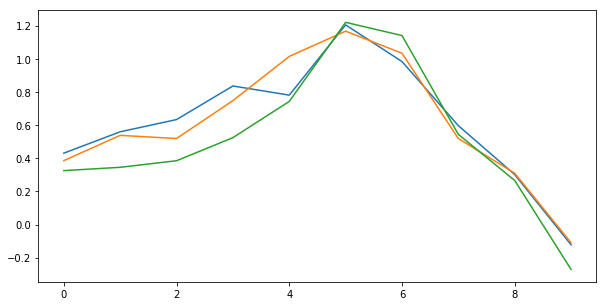

In [6]:
plt.figure(figsize=(10, 5))
for shap in shapelets:
    plt.plot(range(len(shap)), shap)
plt.show()

# 2. Fast Shapelets (a faster brute-force algorithm)

In [7]:
from fast import FastExtractor

In [8]:
fe = FastExtractor()
shapelets = fe.extract(X_train, y_train, nr_shapelets=3, min_len=10, max_len=11)

timeseries: 100%|██████████| 67/67 [00:48<00:00,  1.38it/s]


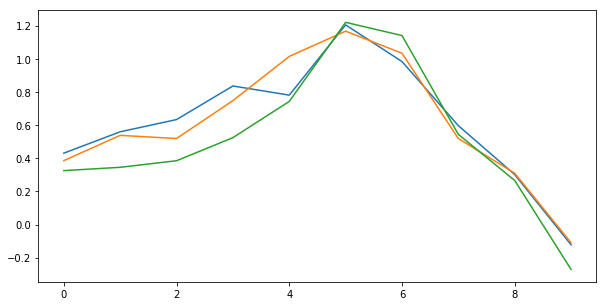

In [9]:
plt.figure(figsize=(10, 5))
for shap in shapelets:
    plt.plot(range(len(shap)), shap)
plt.show()

# 3. SAX Shapelets (approximative algorithm with SAX representations)

In [10]:
from sax import SAXExtractor

In [11]:
se = SAXExtractor()
shapelets = se.extract(X_train, y_train, nr_shapelets=3, min_len=10, max_len=11)

length: 100%|██████████| 1/1 [00:17<00:00, 17.92s/it]


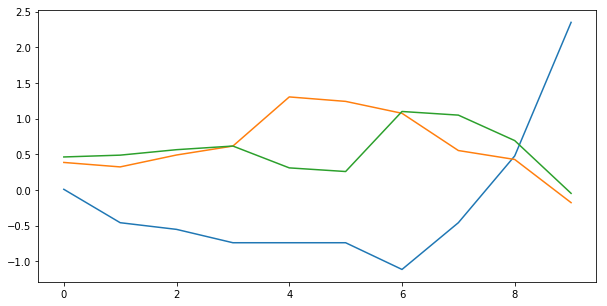

In [12]:
plt.figure(figsize=(10, 5))
for shap in shapelets:
    plt.plot(range(len(shap)), shap)
plt.show()

# 4. Particle Swarm Optimization (a bio-inspired algorithm)

In [13]:
from pso import ParticleSwarmExtractor

In [14]:
pse = ParticleSwarmExtractor()
shapelets = pse.extract(X_train, y_train)

gen	evals	avg    	std     	max     
0  	50   	0.16075	0.102844	0.413352
1  	50   	0.149065	0.116951	0.413352
2  	50   	0.156983	0.103128	0.413352
3  	50   	0.152819	0.10086 	0.413352
4  	50   	0.151428	0.103662	0.413352
5  	50   	0.158191	0.104338	0.413352


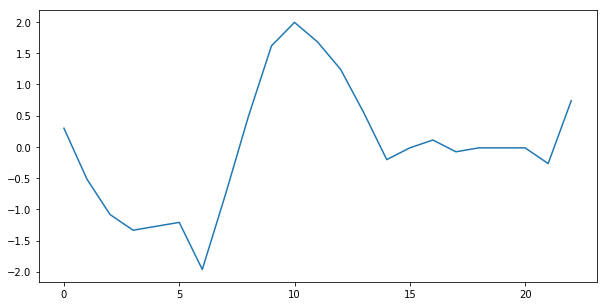

In [15]:
plt.figure(figsize=(10, 5))
for shap in shapelets:
    plt.plot(range(len(shap)), shap)
plt.show()